# This notebook contains the code to reproduce Figures 3 (a), (b) and A.3 in the paper

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import shap
import lime

import facct_util as futil

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load and prepare the data

In [6]:
diabetes = sklearn.datasets.load_diabetes()

# create a binary classification problem 
diabetes.target = diabetes.target > np.median(diabetes.target)

X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, train_size=0.8, random_state=0)

### Linear regression

In [7]:
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, Y_train)

sklearn.metrics.accuracy_score(Y_test, lin_regr.predict(X_test) > 0.5)

0.7078651685393258

### Random forest

In [8]:
from sklearn.model_selection import GridSearchCV

rforest = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=0)
parameters = {'max_depth': [3, 4, 5, 10], 'min_samples_leaf': [1, 5, 10], 'max_features': ['auto', 'sqrt'], 'oob_score': [True]}

clf = GridSearchCV(rforest, parameters)
clf.fit(X_train, Y_train)

sklearn.metrics.accuracy_score(Y_test, clf.predict(X_test))

0.7415730337078652

#### On the test set, 94% of predictions agree

In [9]:
np.mean(clf.predict(X_test) == (lin_regr.predict(X_test) > 0.5))

0.9438202247191011

### Explanation Algorithms

In [10]:
X_train_summary = shap.kmeans(X_train, 25) 

# Shap for the linear regressor
linear_explainer = shap.KernelExplainer(lin_regr.predict, X_train_summary)

# Shap for the random forest
forest_explainer = shap.KernelExplainer(clf.predict, X_train_summary)

### Plots: Figures 3 (a), (b) and A.3 in the paper

In [11]:
sns.set_style("whitegrid")
sns.set_context("notebook", rc={'axes.linewidth': 3, 'grid.linewidth': 1.5},  font_scale=3.5)

---------------------- Example 0 ----------------------
rf prediction: 1. lr prediction: 1


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


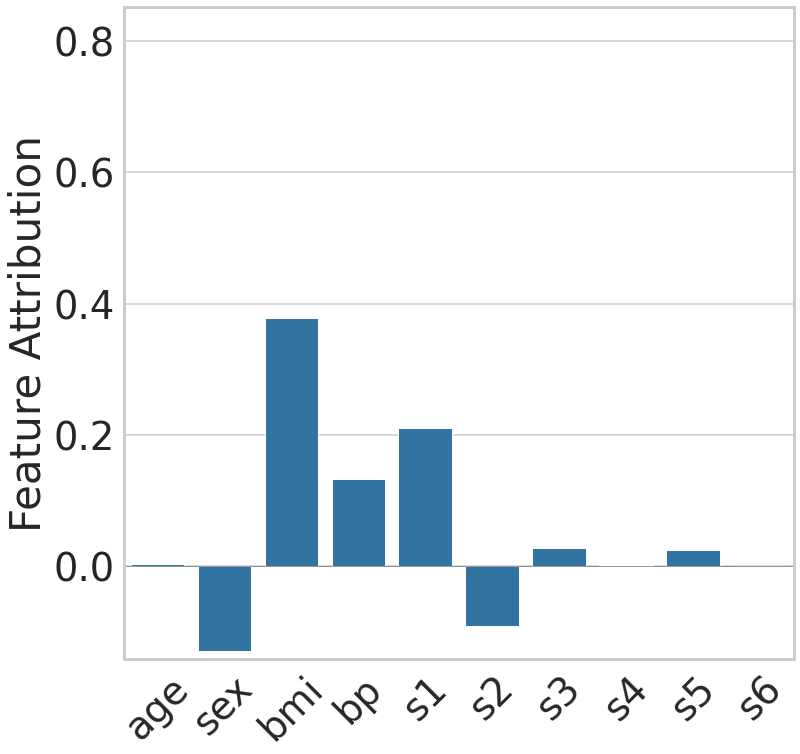

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


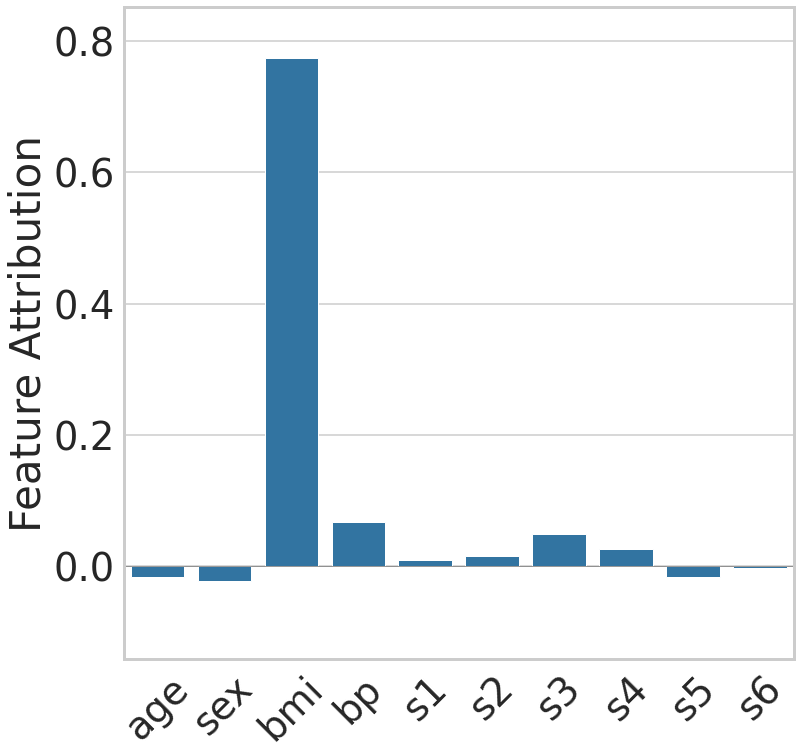

---------------------- Example 1 ----------------------
rf prediction: 1. lr prediction: 1


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


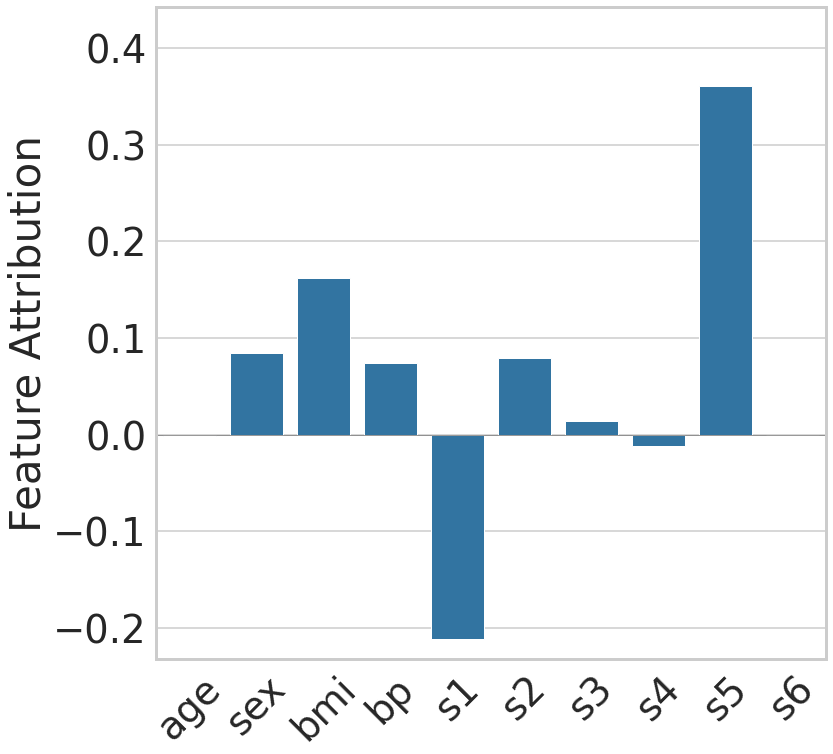

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


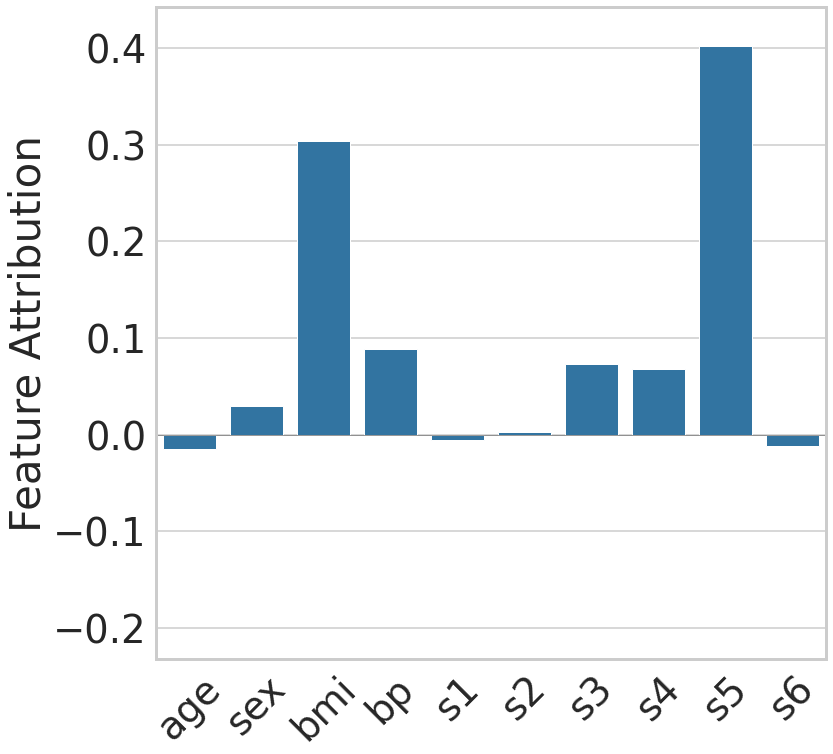

---------------------- Example 2 ----------------------
rf prediction: 1. lr prediction: 1


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


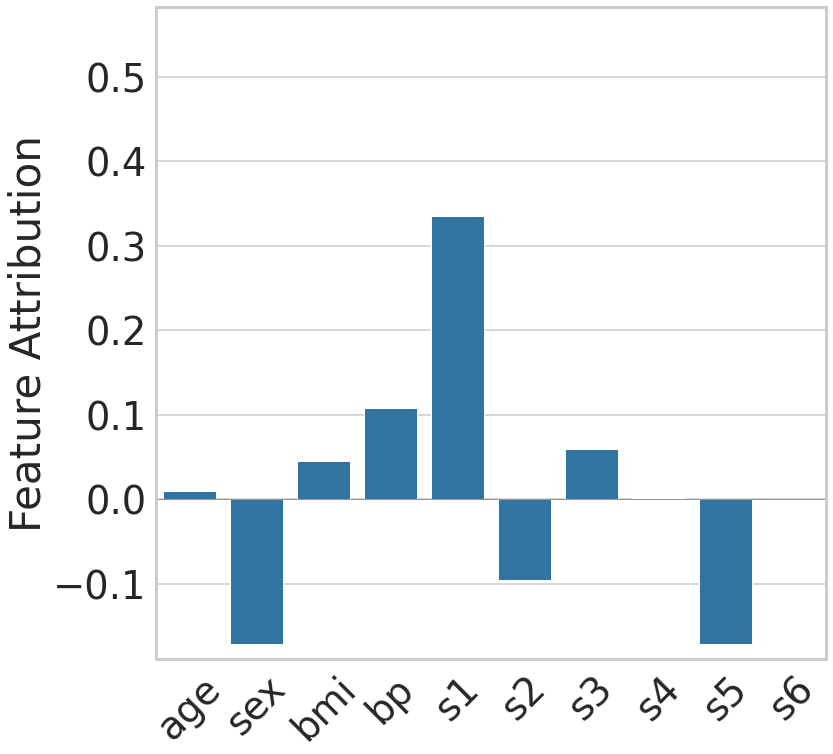

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


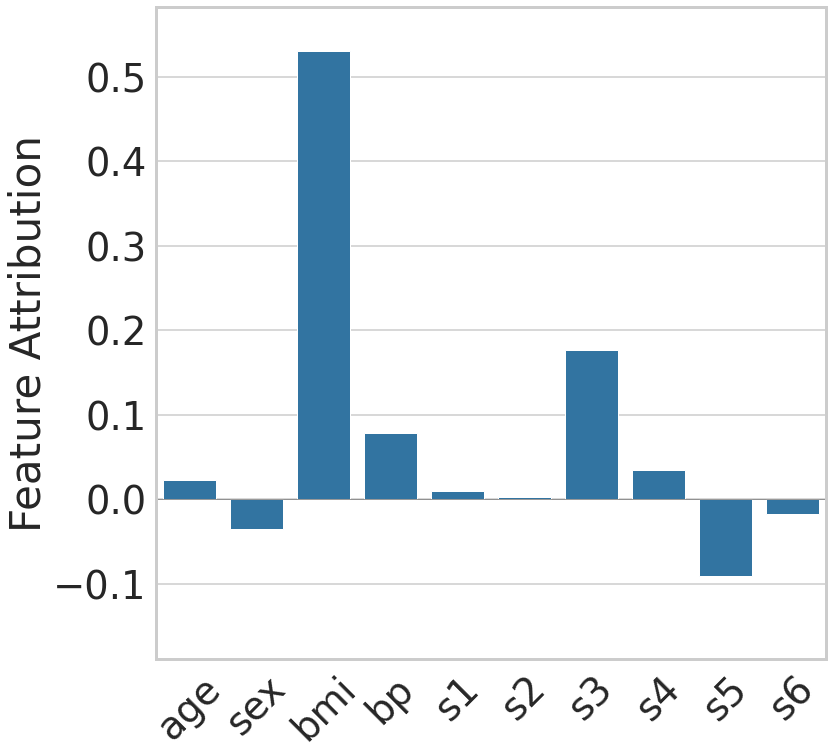

---------------------- Example 3 ----------------------
rf prediction: 0. lr prediction: 0


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


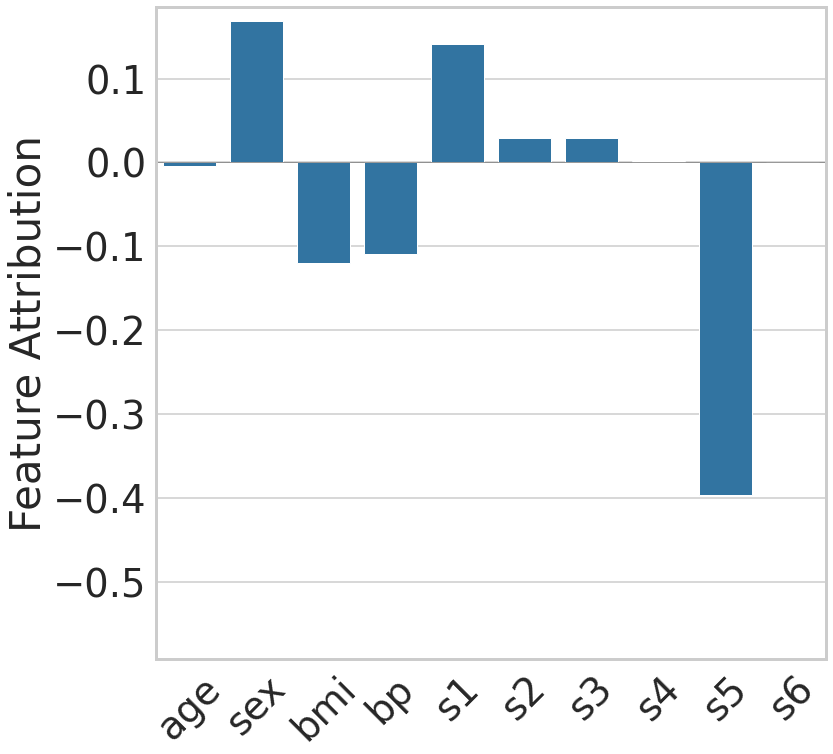

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


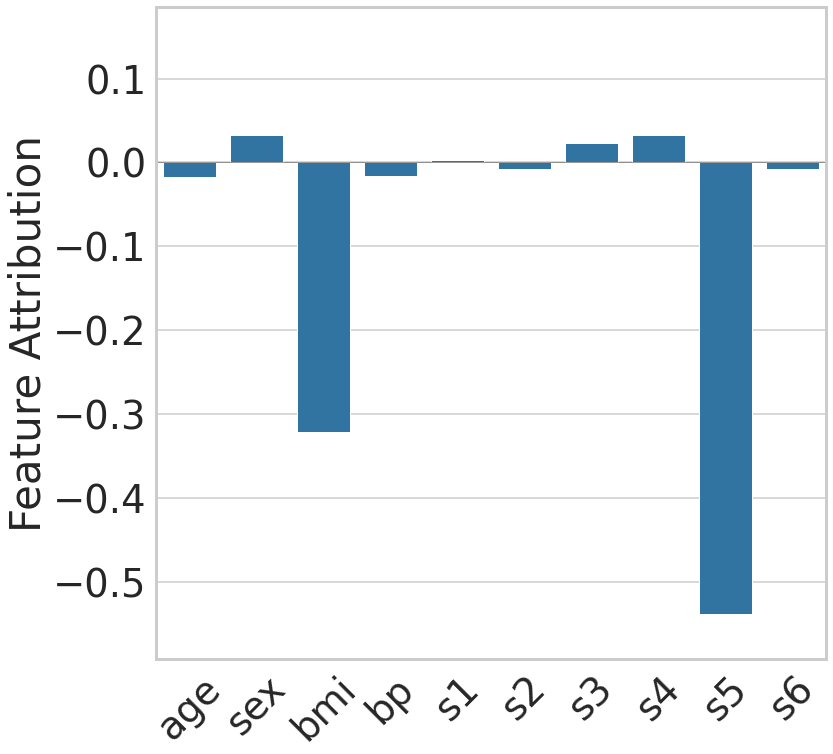

---------------------- Example 4 ----------------------
rf prediction: 1. lr prediction: 1


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


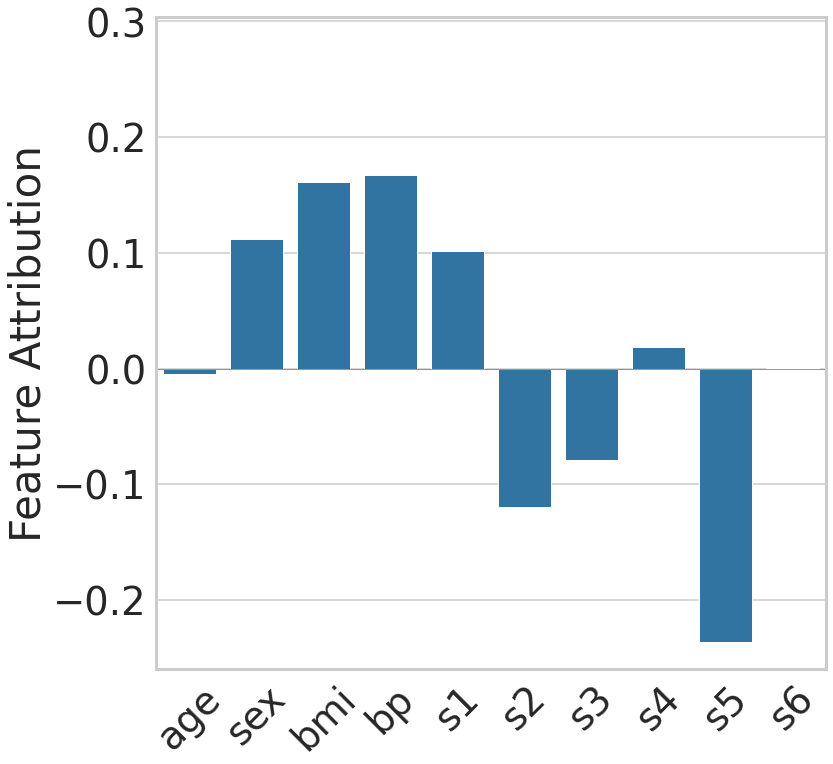

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


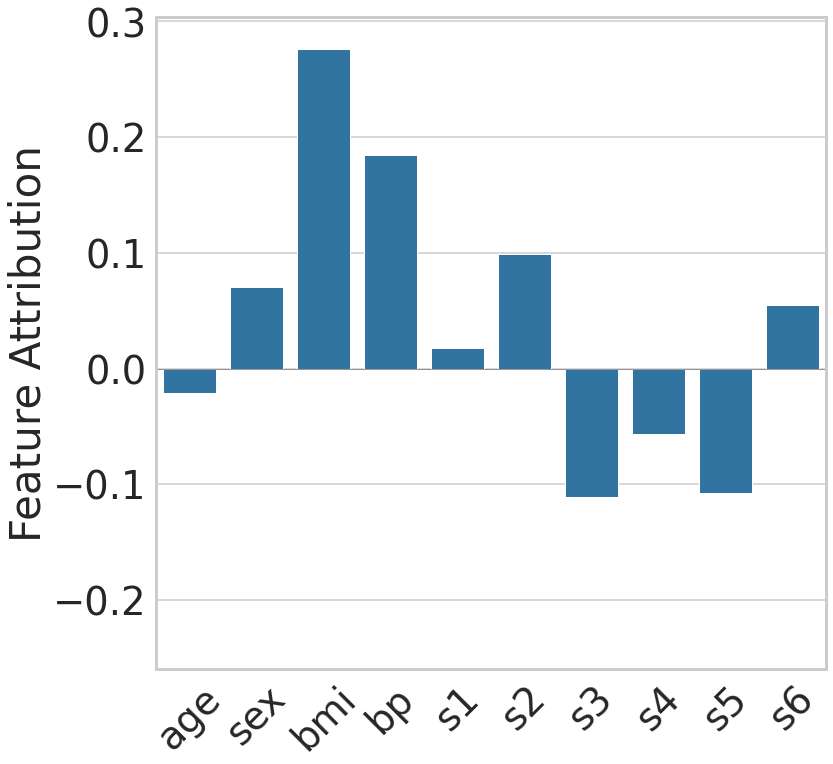

---------------------- Example 5 ----------------------
rf prediction: 1. lr prediction: 1


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


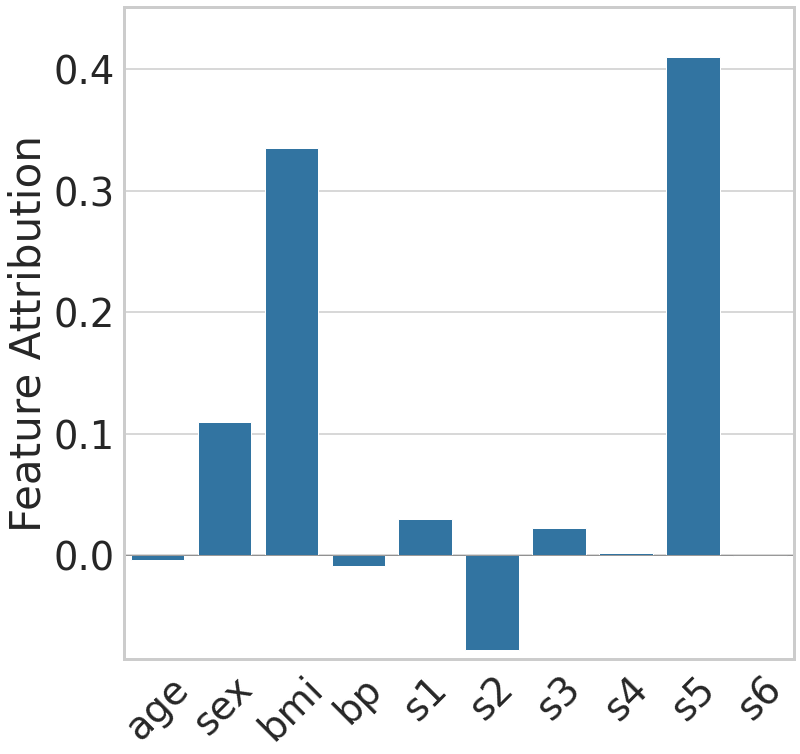

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


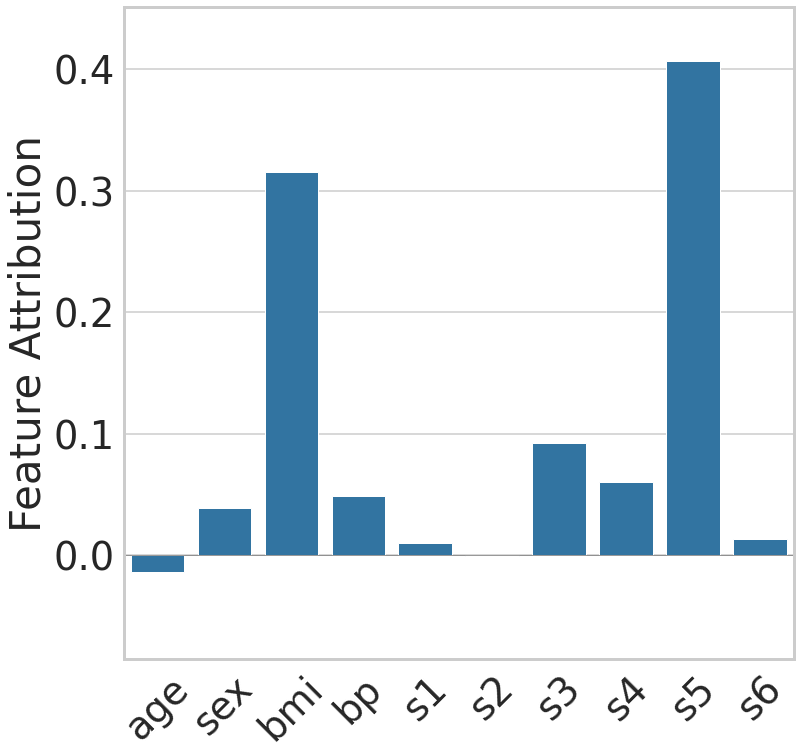

In [13]:
X_train_summary = shap.kmeans(X_train, 25) 

for i in range(min(len(Y_test), 6)):
    x = X_test[i, :]
    print(f"---------------------- Example {i} ----------------------")
    print(f"rf prediction: {int(clf.predict(x.reshape((1, -1))))}. lr prediction: {int(lin_regr.predict(x.reshape((1, -1))) > 0.5)}")
    
    # linear regression 
    linear_shap_values = linear_explainer.shap_values(x)
    linear_shap_values = linear_shap_values / np.linalg.norm(linear_shap_values, 1)
    
    # random forest
    forest_shap_values = forest_explainer.shap_values(x)
    forest_shap_values = forest_shap_values / np.linalg.norm(forest_shap_values, 1)
    
    # Plots  
    ymin = 1.1*min(linear_shap_values.min(), forest_shap_values.min())
    ymax = 1.1*max(linear_shap_values.max(), forest_shap_values.max())
    
    futil.viz_feature_attributions(linear_shap_values, diabetes.feature_names, None, ylim=(ymin, ymax))
    plt.savefig(f'figures/diabetes/{i}_linear.pdf', bbox_inches='tight', facecolor='white')
    plt.show()
    futil.viz_feature_attributions(forest_shap_values, diabetes.feature_names, None, ylim=(ymin, ymax))
    plt.savefig(f'figures/diabetes/{i}_forest.pdf', bbox_inches='tight', facecolor='white')
    plt.show()

In [14]:
for i in range(min(len(Y_test), 6)):
    print(f'Prediction of linear regression for observation {i}: {lin_regr.predict(X_test[i, :].reshape(1, -1)) > 0.5}')
    print(f'Prediction of random forest for observation {i}: {clf.predict(X_test[i, :].reshape(1, -1))}')

Prediction of linear regression for observation 0: [ True]
Prediction of random forest for observation 0: [ True]
Prediction of linear regression for observation 1: [ True]
Prediction of random forest for observation 1: [ True]
Prediction of linear regression for observation 2: [ True]
Prediction of random forest for observation 2: [ True]
Prediction of linear regression for observation 3: [False]
Prediction of random forest for observation 3: [False]
Prediction of linear regression for observation 4: [ True]
Prediction of random forest for observation 4: [ True]
Prediction of linear regression for observation 5: [ True]
Prediction of random forest for observation 5: [ True]
